A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data frame
df =pd.read_csv('Data file.csv')

In [3]:
#dispalaying maximum columns
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
#checking shape
df.shape

(209593, 37)

In [5]:
#checking for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('msisdn',axis=1,inplace=True)
df.drop('pdate',axis=1,inplace=True)

In [7]:
#fetting information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [8]:
#describing the data
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
df['label'].unique()

array([0, 1], dtype=int64)

In [10]:
#checking value counts for variable
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

data is inbalanced

In [11]:
#dropping unneccessory columns
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [12]:
#dropping unneccessory columns#
df.drop('pcircle',axis=1,inplace=True)

<AxesSubplot:>

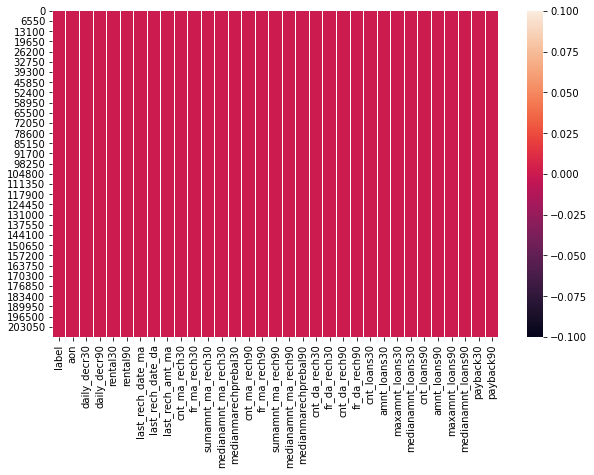

In [13]:
#making heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='label', ylabel='Count'>

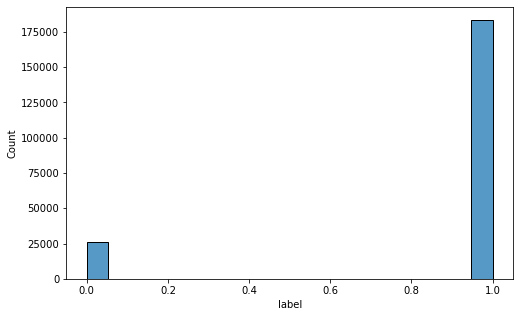

In [14]:
#making hist plot for target column
plt.figure(figsize=(8,5))
sns.histplot(df['label'])

data is imbalanced

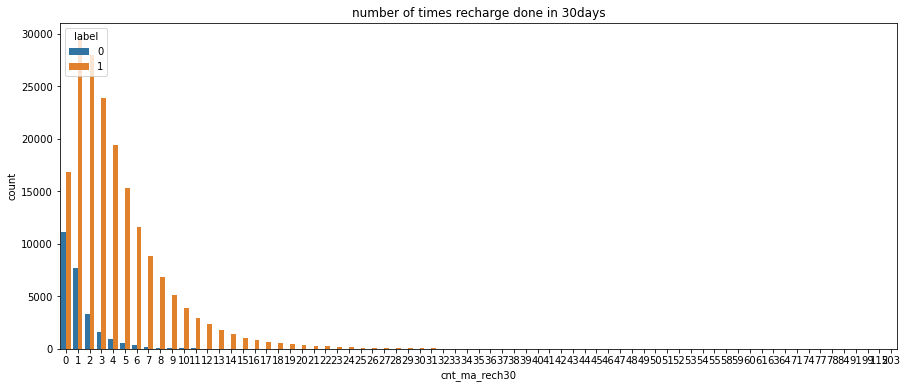

In [15]:
#checking how oftenly cosumer fet their recharges done
plt.figure(figsize=(15,6))
sns.countplot(df['cnt_ma_rech30'],hue='label',data=df)
plt.title('number of times recharge done in 30days')
plt.show()

we can see the consumers are used to recharge their phones mostly 3 to 5 times and theire chances of defaulter are very less. and we can assume the people who doest recharge have high chances of default.

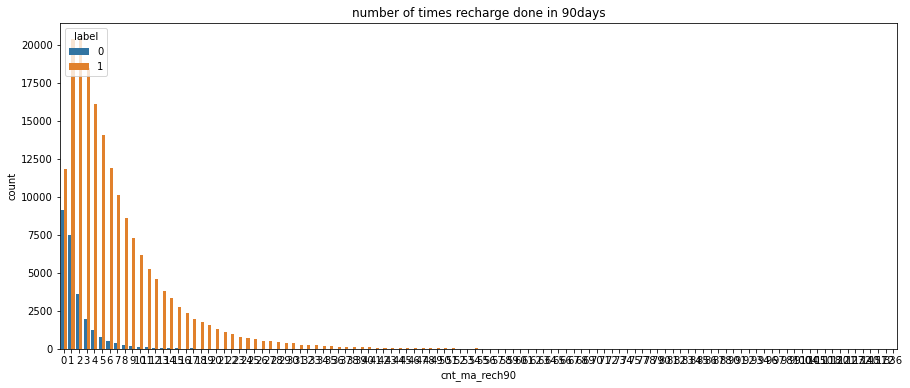

In [16]:
#checking how oftenly cosumer fet their recharges done
plt.figure(figsize=(15,6))
sns.countplot(df['cnt_ma_rech90'],hue='label',data=df)
plt.title('number of times recharge done in 90days')
plt.show()

we can see the consumers are used to recharge their phones mostly 3 to 5 times and theire chances of defaulter are very less. and we can assume thet the people who doesn't recharge their phone from 90days have high chances of default

In [17]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

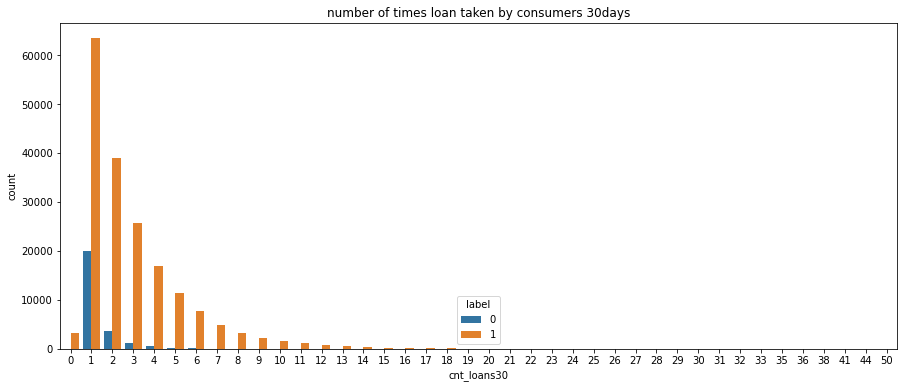

In [18]:
#checking how oftenly cosumer fet their recharges done
plt.figure(figsize=(15,6))
sns.countplot(df['cnt_loans30'],hue='label',data=df)
plt.title('number of times loan taken by consumers 30days')
plt.show()

we can see more numbers of loan taken by users more the chances of getting default and vice versa

In [19]:
#now we balace the data
from scipy.stats import zscore
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]

In [20]:
#changing the name
df_new=df

In [21]:
#splitting the data
x=df.drop('label',axis=1)
y=df.label

In [22]:
#checking the dataset
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [23]:
#checking test data
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [24]:
#correlating the targeted variable and independent variables
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


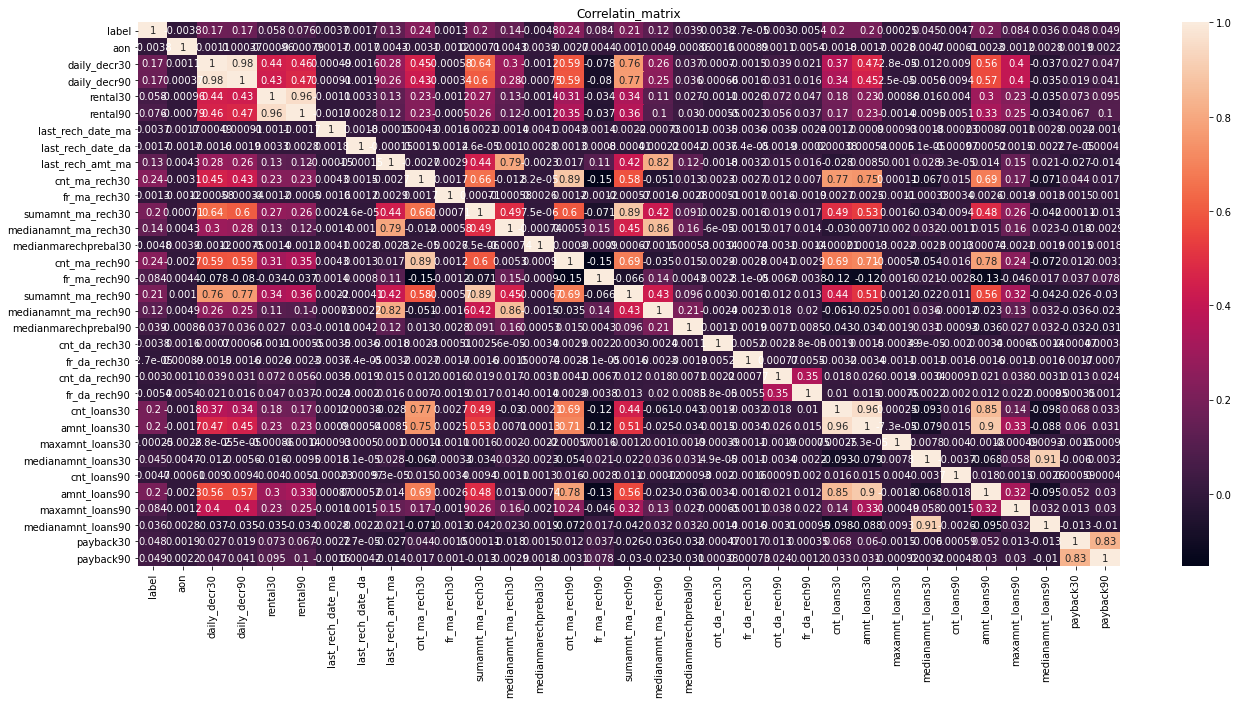

In [25]:
#making heatmap for correlation between targeted and independent variables
plt.figure(figsize=[22,10])
sns.heatmap(df.corr(),annot = True)
plt.title('Correlatin_matrix')
plt.show()

In [26]:
#droping unneccessory columns
x.drop('last_rech_date_da', inplace=True, axis=1)
x.drop('last_rech_amt_ma', inplace=True, axis=1)
x.drop('fr_da_rech90', inplace=True, axis=1)
x.drop('fr_da_rech30', inplace=True, axis=1)
x.drop('aon', inplace=True, axis=1)
x.drop('maxamnt_loans30', inplace=True, axis=1)

<AxesSubplot:>

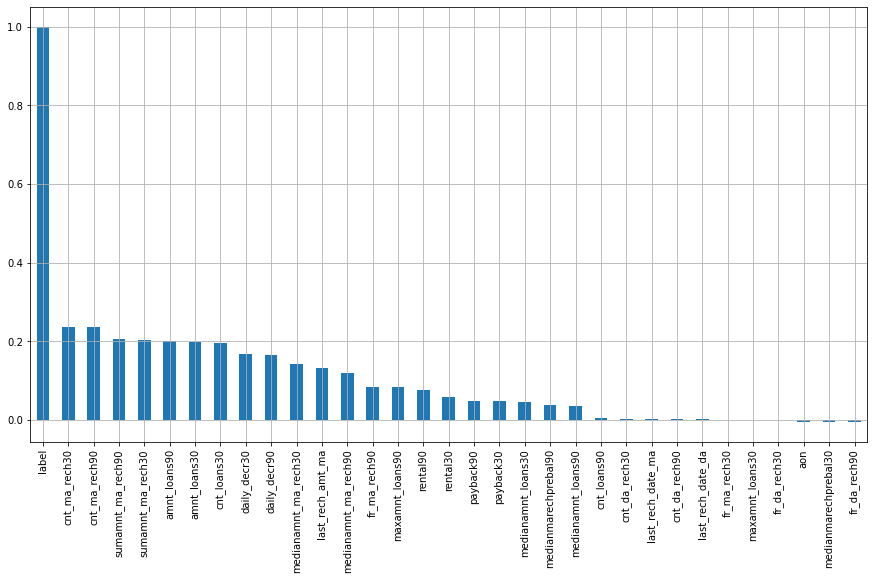

In [27]:
#checking correlation of data with target variable
df.corr()['label'].sort_values(ascending=False).plot.bar(figsize=(15,8),grid=True)

monthly recharge, 3month recharge and loans for both period are highly correlated with target variable

label


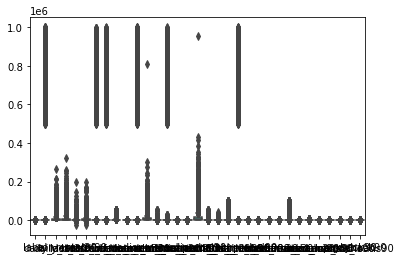

aon


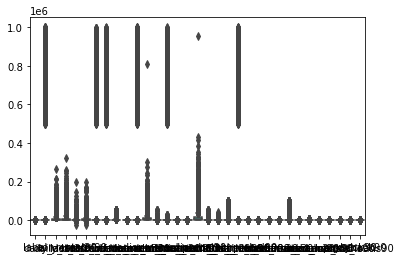

daily_decr30


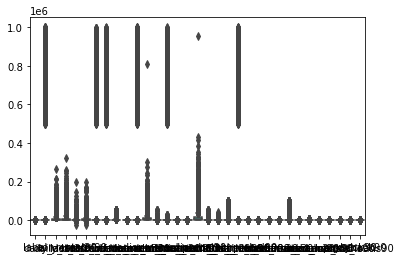

daily_decr90


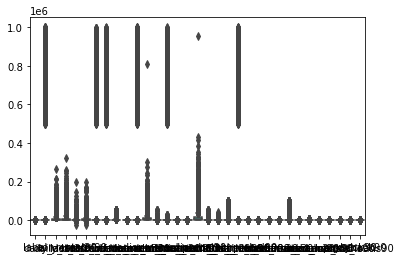

rental30


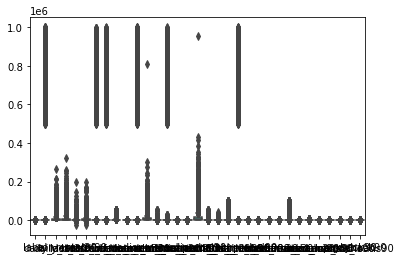

rental90


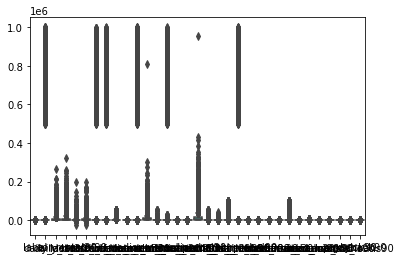

last_rech_date_ma


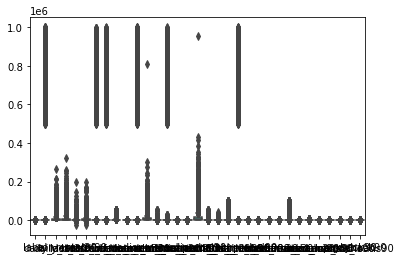

last_rech_date_da


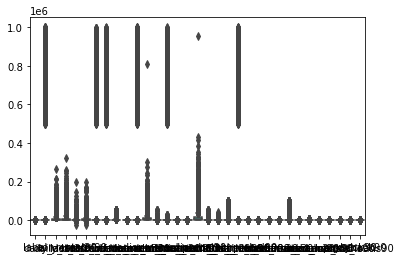

last_rech_amt_ma


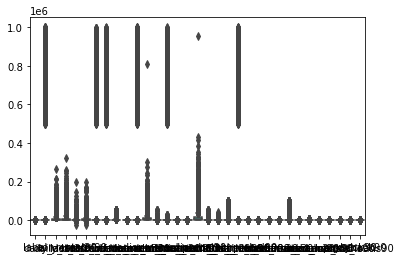

cnt_ma_rech30


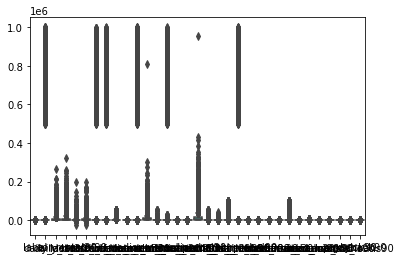

fr_ma_rech30


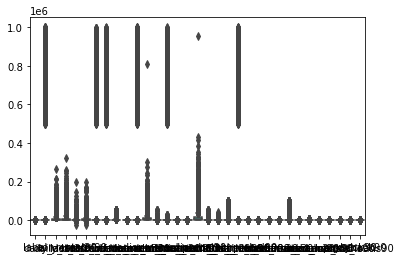

sumamnt_ma_rech30


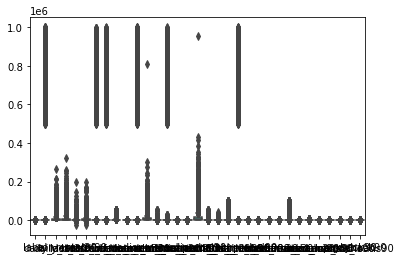

medianamnt_ma_rech30


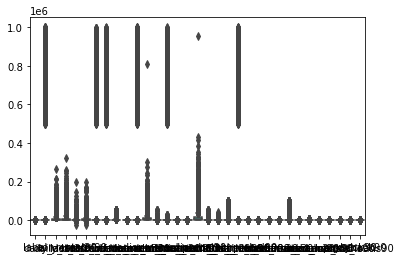

medianmarechprebal30


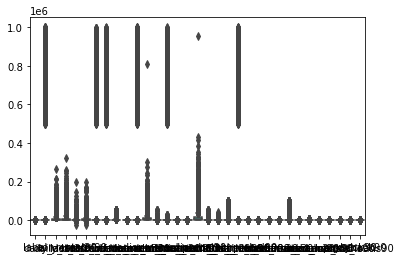

cnt_ma_rech90


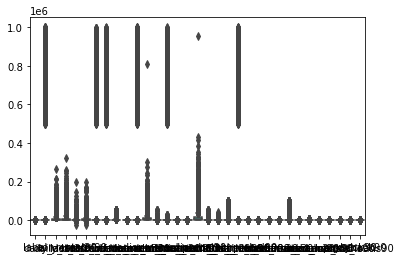

fr_ma_rech90


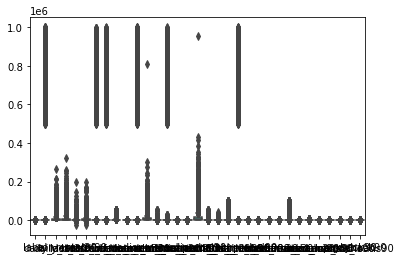

sumamnt_ma_rech90


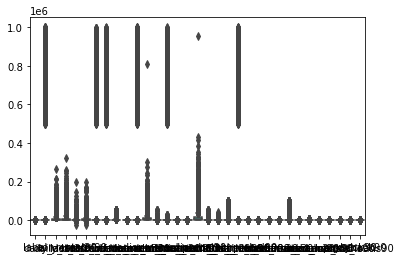

medianamnt_ma_rech90


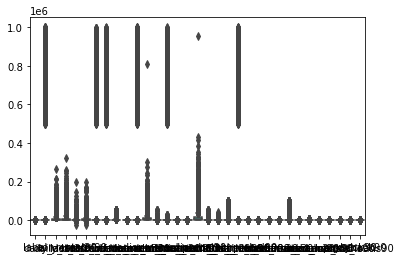

medianmarechprebal90


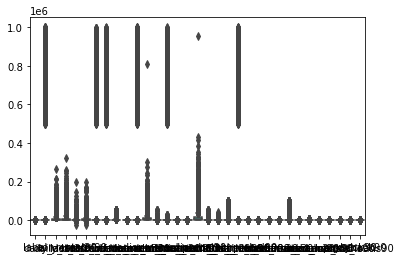

cnt_da_rech30


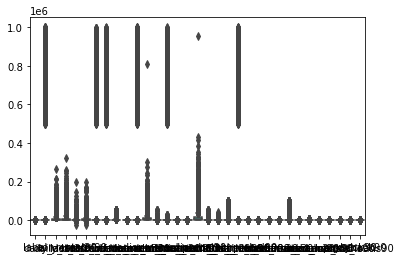

fr_da_rech30


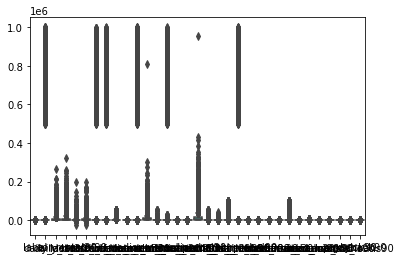

cnt_da_rech90


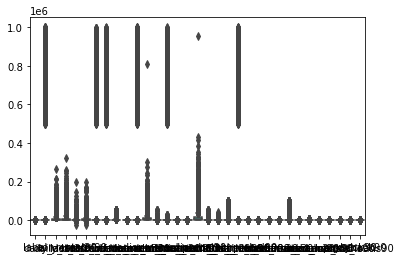

fr_da_rech90


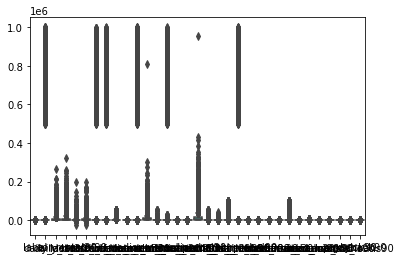

cnt_loans30


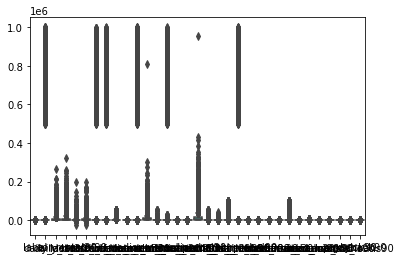

amnt_loans30


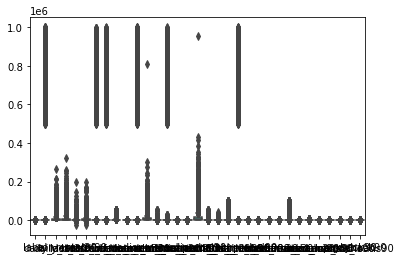

maxamnt_loans30


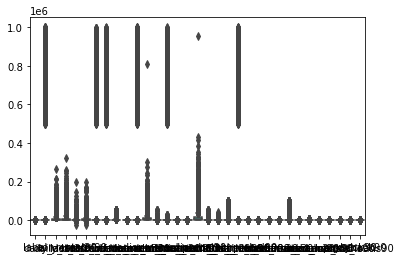

medianamnt_loans30


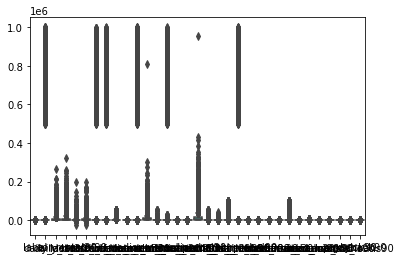

cnt_loans90


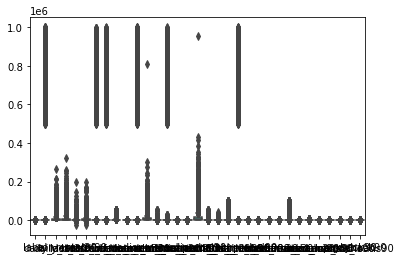

amnt_loans90


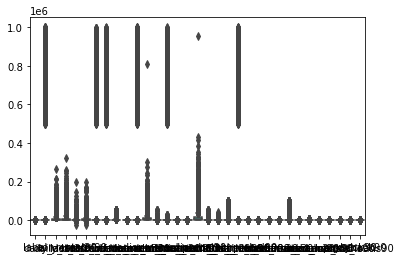

maxamnt_loans90


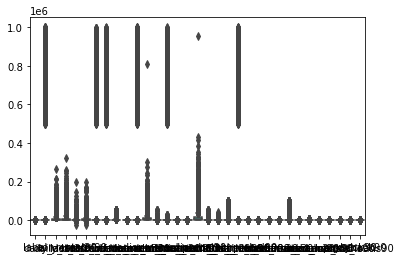

medianamnt_loans90


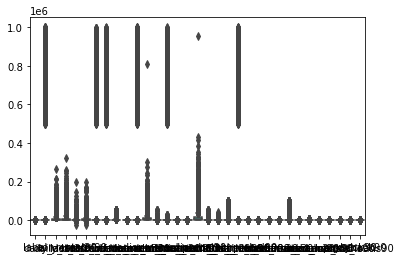

payback30


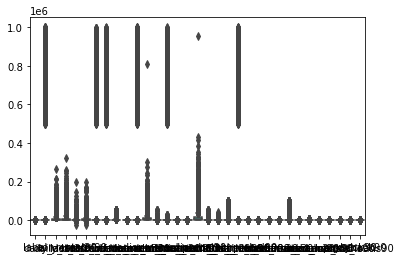

payback90


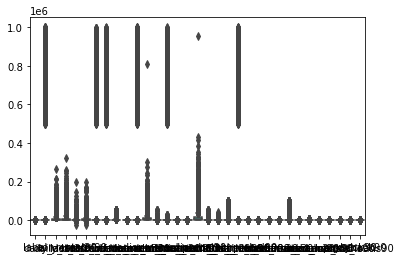

In [28]:
#plotting the box diagrams for outliers and skewness
for col in df:
    print(col)
    sns.boxplot(data=df)
    plt.show()

In [29]:
#checking skewness
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [30]:
#removing skewness from dataframe using power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(df)

df_new =pd.DataFrame(df_new,columns=df.columns)

In [31]:
#checking data after removing skewness
df_new.skew()

label                    -2.270254
aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90        

In [32]:
#assignning new data frame after removing skewness and outliers
df_new=df

In [33]:
#checking shape of train data
x.shape

(209593, 26)

# model training

In [34]:
#mporting library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
#train the model
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS =0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    if accu >maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuray score is',maxAccu,'at random state ',i)

best accuray score is 0.8746922651195633 at random state  199


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=199)

# Logistic regresson

In [37]:
#checking the accuracy score by using logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print('accuracy score is :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is :
0.8701120250386458
[[ 1360  5274]
 [ 1532 44233]]
              precision    recall  f1-score   support

           0       0.47      0.21      0.29      6634
           1       0.89      0.97      0.93     45765

    accuracy                           0.87     52399
   macro avg       0.68      0.59      0.61     52399
weighted avg       0.84      0.87      0.85     52399



In [38]:
#cross validation score using logistic val score
cvs= cross_val_score(lr,x,y,cv=5)
print('cross val score is :',cvs.mean())

cross val score is : 0.8682923612854287


# Random Forest Classifier

In [39]:
#checking the accuracy score by using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)
pred = rfr.predict(x_test)
print('accuracy score is :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is :
0.9118494627760072
[[ 2985  3649]
 [  970 44795]]
              precision    recall  f1-score   support

           0       0.75      0.45      0.56      6634
           1       0.92      0.98      0.95     45765

    accuracy                           0.91     52399
   macro avg       0.84      0.71      0.76     52399
weighted avg       0.90      0.91      0.90     52399



In [40]:
#cross validation score using Random Forest Classifier
cvs= cross_val_score(rfr,x,y,cv=5)
print('cross val score is :',cvs.mean())

cross val score is : 0.9123778056941022


# Decision Tree Classifier

In [41]:
#checking the accuracy score by using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred = dtr.predict(x_test)
print('accuracy score is :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is :
0.8661233993015134
[[ 3394  3240]
 [ 3775 41990]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49      6634
           1       0.93      0.92      0.92     45765

    accuracy                           0.87     52399
   macro avg       0.70      0.71      0.71     52399
weighted avg       0.87      0.87      0.87     52399



In [42]:
#cross validation score using Decision Tree Classifier
cvs= cross_val_score(dtr,x,y,cv=5)
print('cross val score is :',cvs.mean())

cross val score is : 0.8670948114714262


# Ada boost regressor

In [43]:
#checking the accuracy score by using ada boost regressor
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
print('accuracy score is :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is :
0.9015057539266017
[[ 1840  4794]
 [  367 45398]]
              precision    recall  f1-score   support

           0       0.83      0.28      0.42      6634
           1       0.90      0.99      0.95     45765

    accuracy                           0.90     52399
   macro avg       0.87      0.63      0.68     52399
weighted avg       0.90      0.90      0.88     52399



In [44]:
#cross validation score using ada boost regressor
cvs= cross_val_score(ada,x,y,cv=5)
print('cross val score is :',cvs.mean())

cross val score is : 0.9036179591370566


# hyper parameter tunning

In [49]:
parameter = {'n_estimators' : [1,50,200],'criterion':['gini','entropy']}
rf_model= RandomForestClassifier()
model= GridSearchCV(rf_model,parameter, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [56]:
dtr_cv =DecisionTreeClassifier(criterion='entropy',random_state= 199)
dtr_cv.fit(x_train,y_train)
predict= dtr_cv.predict(x_test)
accu = accuracy_score(y_test,predict)
print('accuracy score :',accu)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score : 0.8674783869921182
0.9015057539266017
[[ 1840  4794]
 [  367 45398]]
              precision    recall  f1-score   support

           0       0.83      0.28      0.42      6634
           1       0.90      0.99      0.95     45765

    accuracy                           0.90     52399
   macro avg       0.87      0.63      0.68     52399
weighted avg       0.90      0.90      0.88     52399



# auc roc curve

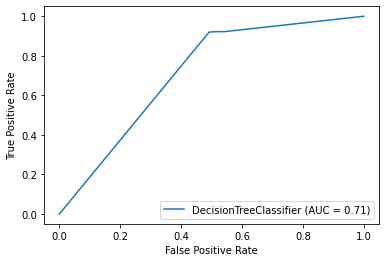

In [57]:
#plotting auc roc curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dtr_cv,x_test,y_test)
plt.show()

# saving the model

In [ ]:
import joblib
joblib.dump(dtr_cv,'micro_df.pkl')